In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [2]:
ls

 diabetes.csv  'Naive Bayes with Gaussian Naive Bayes.ipynb'


In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
# replacing the 0 values with the mean 
df['BMI'] = df['BMI'].replace(0,df["BMI"].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df["BloodPressure"].mean())
df['Glucose'] = df['Glucose'].replace(0,df["Glucose"].mean())
df['Insulin'] = df['Insulin'].replace(0,df["Insulin"].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df["SkinThickness"].mean())

### Handling the outliers

In [8]:
# usign capping technique we remove the values which are greater than 0.98 percentile
q = df["Pregnancies"].quantile(0.98)

# removing 2% data from Pregnancies
data_cleaned = df[df["Pregnancies"]<q]

# removing 1% data from BMI
q = data_cleaned["BMI"].quantile(0.99)
data_cleaned = df[df["BMI"]<q]

# removing 1% data from SkinThickness
q = data_cleaned["SkinThickness"].quantile(0.99)
data_cleaned = df[df["SkinThickness"]<q]

# removing 5% data from Insulin
q = data_cleaned["Insulin"].quantile(0.95)
data_cleaned = df[df["Insulin"]<q]

# removing 1% data from DiabetesPedigreeFunction
q = data_cleaned["DiabetesPedigreeFunction"].quantile(0.99)
data_cleaned = df[df["DiabetesPedigreeFunction"]<q]

# removing 1% data from Age
q = data_cleaned["Age"].quantile(0.99)
data_cleaned = df[df["Age"]<q]


/home/jellyfish/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jellyfish/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jellyfish/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jellyfish/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

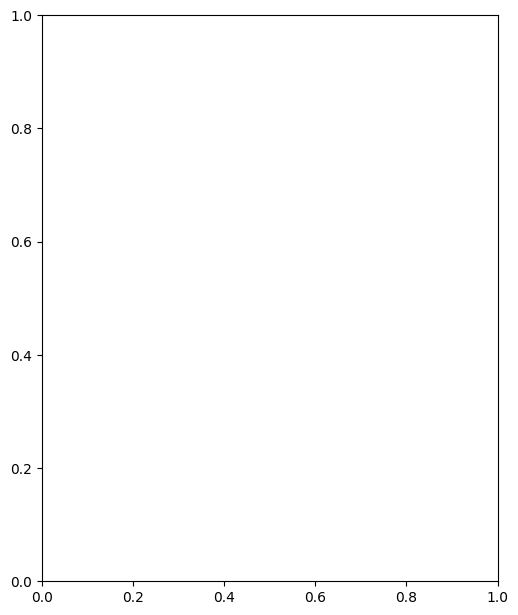

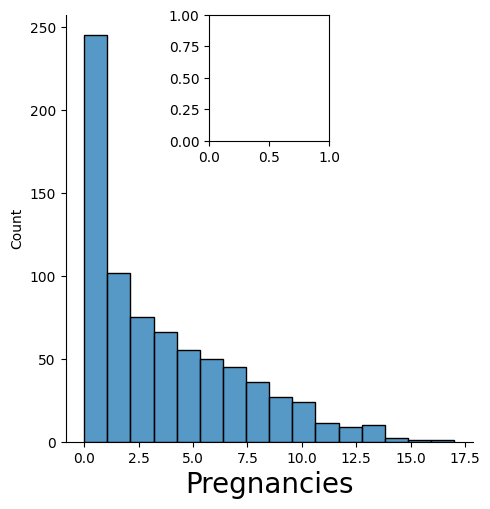

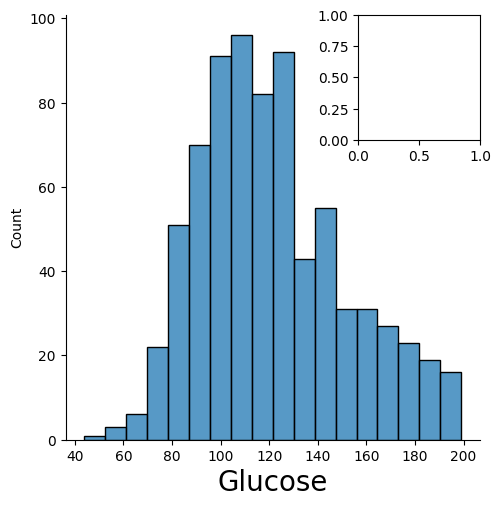

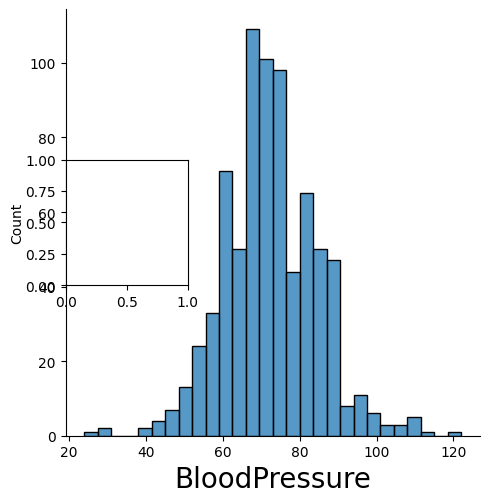

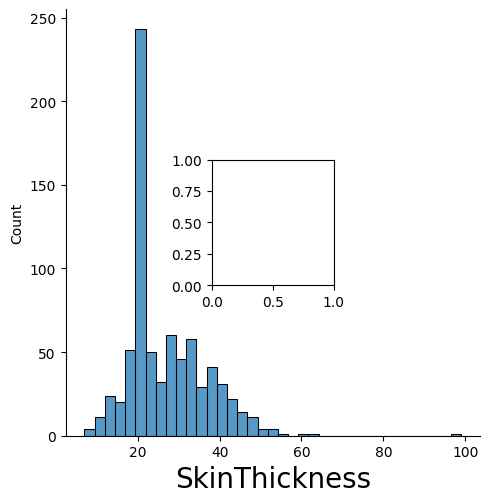

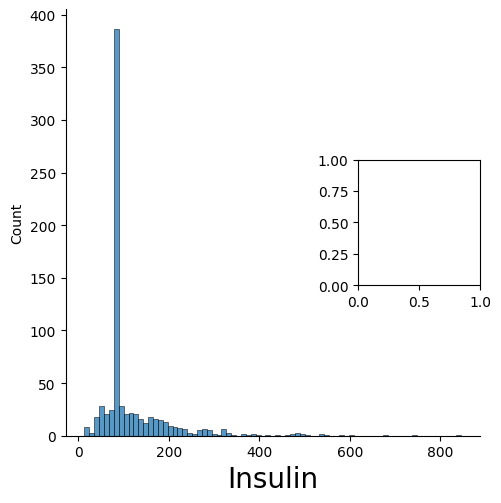

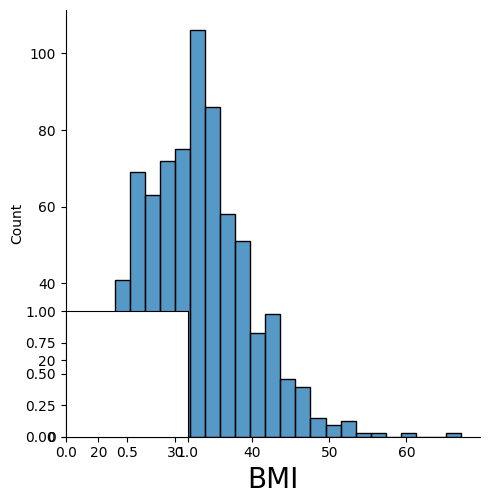

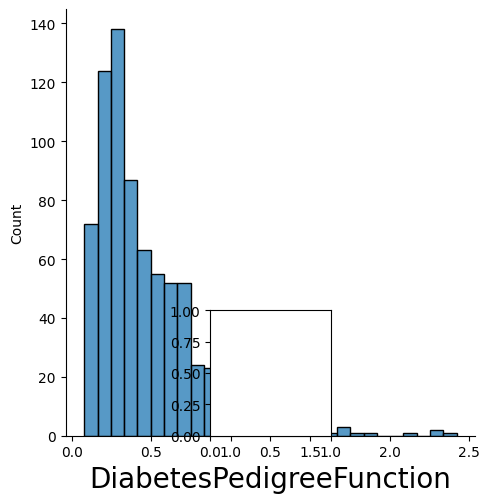

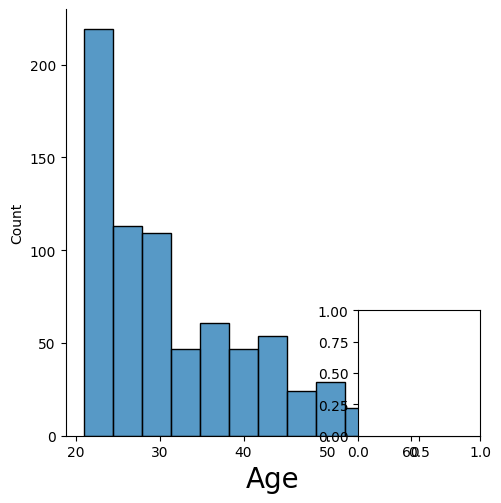

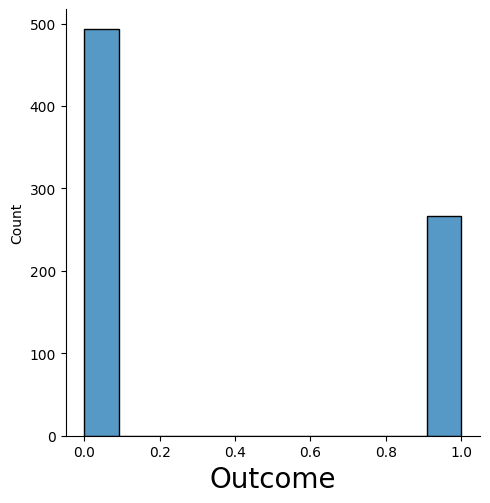

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for col in data_cleaned:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.displot(data_cleaned[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()  

In [10]:
x =df.drop(columns=["Outcome"])
y =df["Outcome"]

In [11]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [12]:
x_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [15]:
# To chekc the multicolinearity if the there are any variable which is higly co-related with other 
# If any variable have value higher than 5 than it is highly corelated with others
vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [18]:
# the vif values are closer to 1 this is fine  
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
GB = GaussianNB()

In [22]:
GB.fit(x_train,y_train)

GaussianNB()

In [23]:
y_pred = GB.predict(x_test)

In [25]:
print("Accuracy score :",accuracy_score(y_test,y_pred))

Accuracy score : 0.7532467532467533


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [28]:
# plot roc auc curve